In [6]:
import pandas as pd
import numpy as np


Choose dataset from local Directory

In [4]:
from google.colab import files
uploaded=files.upload()

Saving salary.csv to salary.csv


Load Dataset

In [7]:
dataset=pd.read_csv('salary.csv')

Summarize Data

In [9]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


Mapping Salary Data to Binary Data

In [10]:
income_set=set(dataset['income'])
dataset['income']=dataset['income'].map({'<=50K':0,'>50K':1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


Segregate data into X and Y

In [11]:
X=dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [12]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

Split Dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Finding the best K value

Text(0, 0.5, 'mean error')

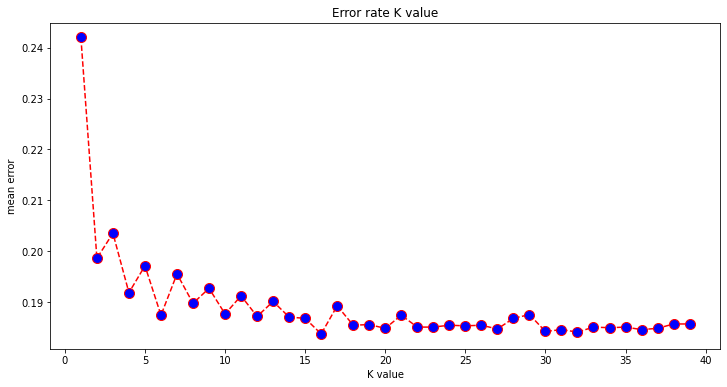

In [15]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#calculating the error values of K between 1 and 40
for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  pred_i=model.predict(X_test)
  error.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(12,6))  
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('mean error')

Training

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=16,metric='minkowski',p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

Prediction of salary of new person

In [19]:
age=int(input("Enter employee age"))
edu=int(input("Enter employee education"))
cg=int(input("enter employee capital gain"))
hpw=int(input("Enter employee hours per week"))
newemp=[[age,edu,cg,hpw]]
result=model.predict(sc.transform(newemp))
print(result)
if result==1:
  print("employee might have got salary above 50K")
else:
  print("employee might have not got salary above 50K")
  


Enter employee age32
Enter employee education12
enter employee capital gain1000
Enter employee hours per week45
[0]
employee might have not got salary above 50K


Prediction for all test data

In [22]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Evaluating model-Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
print(cm)
print("Accuracy of the model:{0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion matrix:
[[5882  311]
 [1185  763]]
Accuracy of the model:81.62387913032796%
